ref. https://sandipanweb.wordpress.com/2017/05/12/some-image-processing-and-computational-photography-convolution-and-filtering-in-python/

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import seaborn as sns
from scipy import signal
from matplotlib.colors import LogNorm, Normalize

In [2]:
img_path = "D:\image_processing_practice\DIP_gonzalez\DIP3E_Problem_Figures\CH03_Problem_Figures\FigP0321(a).tif"

In [3]:
def make_gauss_kernel_1d(extra_size, sigma):
    center = (int)(extra_size*sigma) # avoid visible truncation error
    # center = sigma
    h = np.zeros(2*center+1).astype(float)
    variance = sigma ** 2
    for i in range(h.shape[0]):
        r = center - i
        h[i] = math.exp(-0.5*(r*r)/(variance))
    return h

In [4]:
sd = 3
gaussian_1d_a = np.expand_dims(make_gauss_kernel_1d(5/3, sd), axis=1)
gaussian_1d_b = np.expand_dims(make_gauss_kernel_1d(5/3, sd), axis=1)
gaussian_2d = gaussian_1d_a @ gaussian_1d_b.T
print(gaussian_2d.shape)

(11, 11)


<AxesSubplot:>

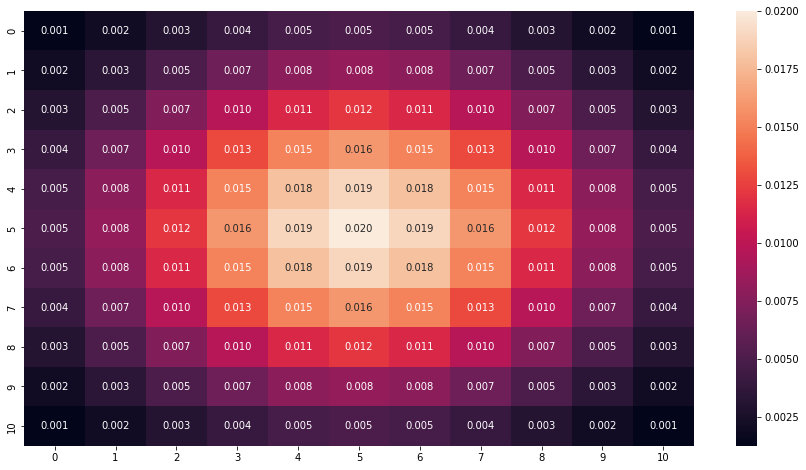

In [5]:
plt.figure(figsize = (15,8))
sns.heatmap(gaussian_2d/50, annot=True, fmt='.3f')

## Check whether gaussian_2d is a linear filter.

In [6]:
dirac_delta_2d = signal.unit_impulse((11,11),"mid")

In [7]:
impulse_response = signal.convolve2d(dirac_delta_2d, gaussian_2d, mode="same")

In [8]:
np.allclose(impulse_response, gaussian_2d) # gaussian_2d is a linear filter

True

In [9]:
# plt.figure(figsize = (10,5))
# sns.heatmap(gaussian_2d, annot=True, fmt='.3f')
# plt.show()
# plt.figure(figsize = (10,5))
# sns.heatmap(impulse_response, annot=True, fmt='.3f')
# plt.show()

## Image Smoothing

(500, 500)


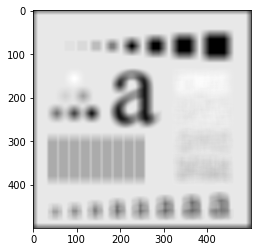

In [10]:
img = plt.imread(img_path)
print(img.shape)
plt.imshow(img, cmap="gray")
plt.show()

(500, 500)


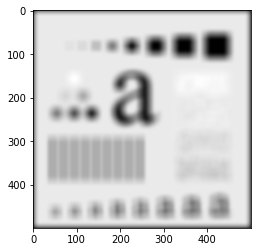

In [11]:
smooth_img = cv2.filter2D(img, -1, gaussian_2d/50, borderType=cv2.BORDER_CONSTANT)
print(smooth_img.shape)
plt.imshow(smooth_img, cmap="gray")
plt.show()

(500, 500)


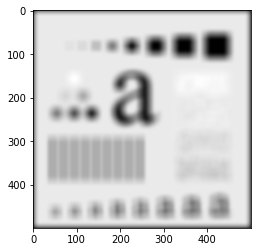

In [12]:
smooth_img_2 = signal.convolve2d(img, gaussian_2d/50, mode="same")
smooth_img_2 = np.around(smooth_img_2).astype(int)
print(smooth_img_2.shape)
plt.imshow(smooth_img_2, cmap="gray")
plt.show()

In [13]:
# Test that signal.convolve2d is the same as cv2.filter2D
np.allclose(smooth_img, smooth_img_2, atol=1)

True

## Image Sharpening

In [14]:
double_scaled_dirac_2d = 2*dirac_delta_2d
sharpen_gaussian_2d = double_scaled_dirac_2d - (gaussian_2d/50)

<AxesSubplot:>

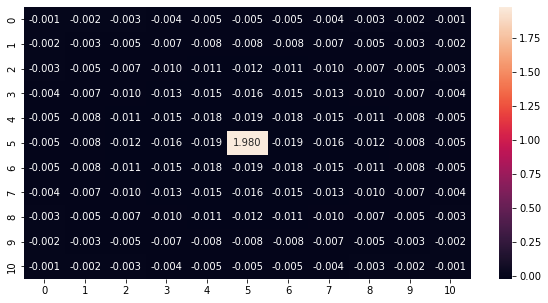

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(sharpen_gaussian_2d, annot=True, fmt='.3f')

(500, 500)


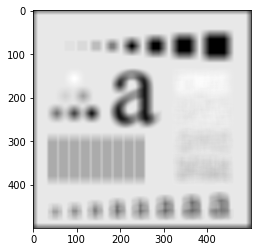

In [16]:
print(img.shape)
plt.imshow(img, cmap="gray")
plt.show()

(500, 500)


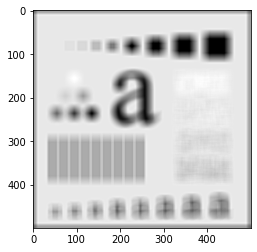

In [17]:
sharpened_img = cv2.filter2D(img, -1, sharpen_gaussian_2d, borderType=cv2.BORDER_CONSTANT)
print(sharpened_img.shape)
plt.imshow(sharpened_img, cmap="gray")
plt.show()

## Play with Flower

https://stackoverflow.com/questions/58383477/how-to-create-a-python-convolution-kernel

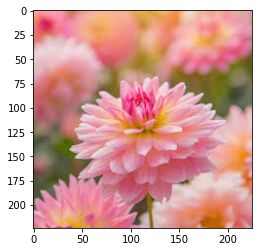

In [18]:
flower = plt.imread(r"D:\image_processing_practice\code_practice\DIP_burge\assets\flower.jpg")
plt.imshow(flower)
plt.show()

(224, 225, 3)


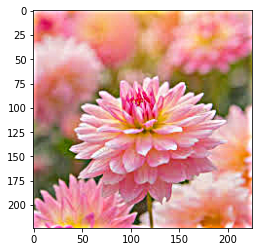

In [19]:
sharpened_flower = cv2.filter2D(flower, -1, sharpen_gaussian_2d, borderType=cv2.BORDER_CONSTANT)
print(sharpened_flower.shape)
plt.imshow(sharpened_flower)
plt.show()

(224, 225, 3)


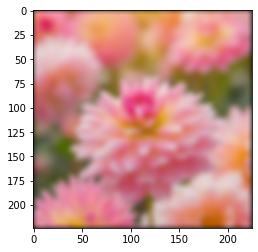

In [20]:
smooth_flower = cv2.filter2D(flower, -1, gaussian_2d/50, borderType=cv2.BORDER_CONSTANT)
print(smooth_flower.shape)
plt.imshow(smooth_flower)
plt.show()

(224, 225, 3)


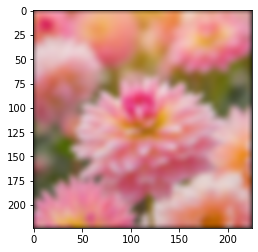

In [21]:
pre_smooth_flower = cv2.filter2D(flower, -1, gaussian_1d_a/np.sqrt(50), borderType=cv2.BORDER_CONSTANT)
post_smooth_flower = cv2.filter2D(pre_smooth_flower, -1, (gaussian_1d_b.T)/np.sqrt(50), borderType=cv2.BORDER_CONSTANT)
print(post_smooth_flower.shape)
plt.imshow(post_smooth_flower)
plt.show()

In [22]:
# Test the x/y separability and linearity of convolution
# allow atol=1 to compensate rounding problem
np.allclose(post_smooth_flower, smooth_flower, atol=1)

True